# Natural Language Procressing

In [881]:
import nltk

In [882]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/egekibar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/egekibar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/egekibar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [883]:
text = "Yaylaya gitmişti yayla zamanı, Gülizar döndü de Döndü dönmedi"

In [884]:
text.split() # tokenize yaptık

['Yaylaya',
 'gitmişti',
 'yayla',
 'zamanı,',
 'Gülizar',
 'döndü',
 'de',
 'Döndü',
 'dönmedi']

In [885]:
from nltk.tokenize import sent_tokenize

In [886]:
cumle = "Merhaba, benim adım Baki Ege. Yapay zeka öğreniyorum."

In [887]:
sent_tokenize(cumle)

['Merhaba, benim adım Baki Ege.', 'Yapay zeka öğreniyorum.']

In [888]:
from nltk.tokenize import word_tokenize  

In [889]:
word_tokenize(cumle)

['Merhaba',
 ',',
 'benim',
 'adım',
 'Baki',
 'Ege',
 '.',
 'Yapay',
 'zeka',
 'öğreniyorum',
 '.']

In [890]:
from nltk import TreebankWordTokenizer

In [891]:
TreebankWordTokenizer().tokenize(cumle)

['Merhaba',
 ',',
 'benim',
 'adım',
 'Baki',
 'Ege.',
 'Yapay',
 'zeka',
 'öğreniyorum',
 '.']

In [892]:
from nltk import WordPunctTokenizer

In [893]:
WordPunctTokenizer().tokenize(cumle)

['Merhaba',
 ',',
 'benim',
 'adım',
 'Baki',
 'Ege',
 '.',
 'Yapay',
 'zeka',
 'öğreniyorum',
 '.']

In [894]:
from nltk import BlanklineTokenizer

In [895]:
BlanklineTokenizer().tokenize('''
Merhaba hocam

Sınavdan 99 aldım 100 bekliyordum

görsümek üzere

''')

['\nMerhaba hocam', 'Sınavdan 99 aldım 100 bekliyordum', 'görsümek üzere']

In [896]:
from nltk import RegexpTokenizer

In [897]:
RegexpTokenizer('[A-Z]\w+').tokenize("She secures 90.56% in class X. She is a mertiorius student")

['She', 'She']

#### Stemma & Lemma 

Ekleri kaldirip kökleri bulma

In [898]:
from nltk.stem import PorterStemmer 

In [899]:
ps = PorterStemmer()

In [900]:
ps.stem('running')

'run'

In [901]:
ps.stem('runs')

'run'

In [902]:
words = ['run', 'runner', 'running', 'ran', 'runs', 'easily', 'fairly']

In [903]:
kokler = [ps.stem(word) for word in words] # list comprehension (küçük döngü)

In [904]:
kokler

['run', 'runner', 'run', 'ran', 'run', 'easili', 'fairli']

In [905]:
from nltk.stem import WordNetLemmatizer

In [906]:
wnl = WordNetLemmatizer()

In [907]:
wnl.lemmatize('working')

'working'

In [908]:
wnl.lemmatize('working', pos='v') # POS = Part of Speech

'work'

In [909]:
wnl.lemmatize('took', pos='v')

'take'

In [910]:
# Part of Speech (POS) Tagging Adjective, Adverb, conjunction and, or preposition

In [911]:
nltk.pos_tag(word_tokenize("I am learning NLP")) 

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('NLP', 'NNP')]

In [912]:
# pip install autocorrect 
# Yazoım hatası düzeltme paketi

In [913]:
from autocorrect import Speller

In [914]:
spell = Speller(lang='en')

In [915]:
spell('my nammme is Ege')

'my name is Age'

In [916]:
from textblob import TextBlob

In [917]:
text = TextBlob("I am lerning NLP")

In [918]:
text.correct()

TextBlob("I am leaning NLP")

In [919]:
from langdetect import detect

In [920]:
detect("I am learning NLP")

'en'

In [921]:
detect("Ben yapay zeka öğreniyorum")

'tr'

In [922]:
detect("ich bin in der Türkei")

'de'

In [923]:
from textblob import TextBlob
from googletrans import Translator

In [924]:
blob = TextBlob("I am learning NLP")

In [925]:
translate = Translator().translate(blob.string, src='en', dest='tr')

In [926]:
translate.text

'NLP öğreniyorum'

#### Bir NLP projesine başlarken ilk yapılması gerekenler:

1- Herşeyi küçük harfe çevirme

2- Noktalama işaretlerini kaldırma

3- Rakamları kaldırma

4- Satırsonu, boşlukları kaldırma

5- Stopwords'leri kaldırma (gereksiz kelimeler) yani the, is, are, etc. ee, aa, vb.

6- Tokenization

7- Lemma & Stemma ile ekleri kaldır kökleri bul

8- Vektörleştirme (Word2Vec, TF-IDF, CountVectorizer) 

In [927]:
# TF-IDF term frequency - inverse document frequency

In [928]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [929]:
cumleler = [
    'Merhaba benim adım Baki Ege',
    'Call me a cab',
    'please call me... PLEASE!'
]

In [930]:
vectorizer = CountVectorizer()

In [931]:
import pandas as pd

In [932]:
tf = pd.DataFrame(vectorizer.fit_transform(cumleler).toarray(), columns=vectorizer.get_feature_names_out())

In [933]:
tf # Term Frequency yani kelimenin kaç defa geçtiği

,adım,baki,benim,cab,call,ege,me,merhaba,please
0,1,1,1,0,0,1,0,1,0
1,0,0,0,1,1,0,1,0,0
2,0,0,0,0,1,0,1,0,2


In [934]:
df = vectorizer.fit_transform(cumleler).toarray().sum(axis=0)

In [935]:
df # kelimenin kaç defa geçtiği

array([1, 1, 1, 1, 2, 1, 2, 1, 2])

In [936]:
tf/df # invert document frequency yani kelimenin kaç belgede geçtiği

,adım,baki,benim,cab,call,ege,me,merhaba,please
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.5,0.0,0.5,0.0,0.0
2,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1.0


#### NLP - Restaurant Review Project

In [937]:
import pandas as pd

In [938]:
df = pd.read_csv('yelp.csv')

In [939]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [940]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [941]:
df.shape

(10000, 10)

#### Bir NLP projesine başlarken ilk yapılması gerekenler:

1- Herşeyi küçük harfe çevirme

2- Noktalama işaretlerini kaldırma

3- Rakamları kaldırma

4- Satırsonu, boşlukları kaldırma

5- Stopwords'leri kaldırma (gereksiz kelimeler) yani the, is, are, etc. ee, aa, vb.

6- Tokenization

7- Lemma & Stemma ile ekleri kaldır kökleri bul

8- Vektörleştirme (Word2Vec, TF-IDF, CountVectorizer) 

In [942]:
df['text'] = df.text.str.lower()
df['text'] = df.text.str.replace('[^\w\s]', '', regex=True)
df['text'] = df.text.str.replace('\n', '', regex=True)
df['text'] = df.text.str.replace('\d+', '', regex=True)
df['text'] = df.text.str.replace('\r', '', regex=True)

In [943]:
df.text[6]

'drop what youre doing and drive here after i ate here i had to go back the next day for more  the food is that goodthis cute little green building may have gone competely unoticed if i hadnt been driving down palm rd to avoid construction  while waiting to turn onto th street the grand opening sign caught my eye and my little yelping soul leaped for joy  a new place to tryit looked desolate from the outside but when i opened the door i was put at easy by the decor smell and cleanliness inside  i ordered dinner for two to go  the menu was awesome  i loved seeing all the variety poblano peppers mole mahi mahi mushroomssomething wrapped in banana leaves  it made it difficult to choose something  heres what ive had so far la condesa shrimp burro and baja sur dogfish shark taco  they are both were very delicious meals but the shrimp burro stole the show  so much flavor  i snagged some bites from my hubbys mole and mahi mahi burros mmmm such a delight  the salsa bar is endless  i really sto

In [944]:
import seaborn as sns

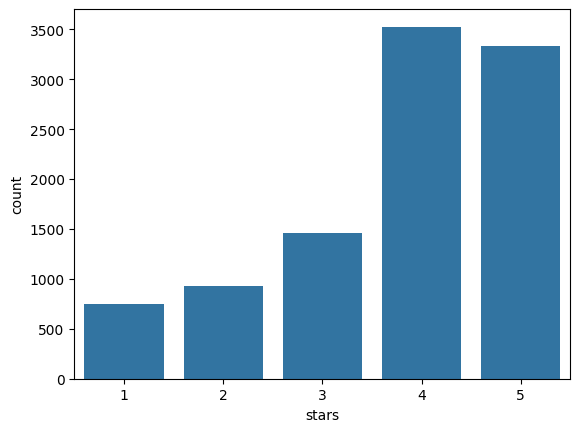

In [945]:
sns.countplot(x=df.stars);

#### Sentiment Analysis (Duygu Analizi)

In [946]:
yelp = df[(df.stars == 1) | (df.stars == 5)]

In [947]:
yelp.reset_index(drop=True, inplace=True)

In [948]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what youre doing and drive here after i a...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [949]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [950]:
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [951]:
def lemma (text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [952]:
vect = CountVectorizer(stop_words="english", max_features=10000, ngram_range=(1,2), analyzer=lemma)

In [953]:
x = yelp.text
y = yelp.stars

In [954]:
x = vect.fit_transform(x)

/Users/egekibar/Github/ai-course/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:537: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/Users/egekibar/Github/ai-course/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [955]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [956]:
#tf = pd.DataFrame(vectorizer.fit_transform(x_train).toarray(), columns=vectorizer.get_feature_names_out())

In [957]:
# tf.head()

In [958]:
# tf.shape

In [959]:
l = LogisticRegression()
r = DecisionTreeClassifier()

In [960]:
l.fit(x_train, y_train);

In [961]:
pred = l.predict(x_test)

In [962]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [963]:
accuracy_score(y_test, pred)

0.9229828850855746

In [964]:
from textblob import TextBlob

In [965]:
TextBlob('I love this restaurant').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [966]:
TextBlob('You are the best').sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [967]:
TextBlob(df.text[0]).sentiment

Sentiment(polarity=0.3906666666666666, subjectivity=0.65584126984127)

In [968]:
TextBlob(df.text[23]).sentiment

Sentiment(polarity=-0.22007575757575754, subjectivity=0.5928030303030303)